In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from numba import jit

In [ ]:
# Função 1

# # Receber imagem
# # colocar bordas 
# # Retorna a imagem com bordas

# Função 2
# # Receber a imagem cinza com bordas 
# # Criar a lista de Kernels
# # retorna a lista de Kernels

# Função 3
# # Receber a lista de Kernels 
# # Gerar de cada kernel um valor de média
# # Colocar cada resultado na nova matriz


In [36]:


# Receber imagem Original
# Mudar para tons de cinza

def image_to_gray(image):
    image_gray = np.zeros((len(image), len(image[0])),dtype=np.uint8)

    for i in range(len(image)):
        for j in range(len(image[0])):
            image_gray[i][j] = (int( image[i][j][0] )+ int(image[i][j][1] )+ int(image[i][j][2] ) )/ len(image[0][0])
    
    return image_gray


# Recebe em tons de cinza
# Colocar Borda na imagem

def zero_box(image, kernel=3):

    var = int((kernel - 1) / 2)
    mask_zeros = np.zeros((len(image) + kernel - 1, len(image[0]) + kernel - 1), dtype=np.uint8) # cria a borda de zeros
    mask_zeros[var:len(image) + var, var:len(image[0]) + var] = image # sobrepoe a imagem sentralizada na matriz

    return mask_zeros


# Recebe a Imagem com as bordas
# Cria a Lista de Kernels

def slice_image(image_in_box, kernel):

    borda = int((kernel-1)/2) 

    input_blur = image_in_box

    var  = kernel - borda

    slice_list = []

    for i in range(len(image_in_box)): #linhas 
        for j in range(len(image_in_box[0])): #colunas

            if (i >= borda and i < (len(image_in_box) -borda))  and ( j >= borda and j < len(image_in_box[0]) -borda):

                slice = image_in_box[i-borda:i+var, j-borda:j+var]

                slice_list.append(slice)
                
    return slice_list

# Recebe a Lista de Kernels
# Gerar a Lista dos cálculos

def calc_slice_averages(slice_list):
    
    results = []
    for i in slice_list:
        average = np.mean(i)
        results.append(average)
    return results



def build_thresh_adapt(results,image, c):
    '''
    entrar com imagem já inserida em uma matriz com bordas 
    kernel determina a borda da imagem

    retorna o resultado com as bordas da matriz
    '''
    adapted_image = np.array(results).reshape(image.shape).astype(np.uint8)

    m_suporte = np.zeros((len(image), len(image[0])),dtype=np.uint8)

    for i in range(len(m_suporte)):
        for j in range(len(m_suporte[0])):

            if image[i][j]< adapted_image[i][j] - c:
                m_suporte[i][j] = 0
            else:
                m_suporte[i][j] = 255

    return m_suporte

# Recebe a Lista de Valores
# Retornar ums nova imagem nas dimensões da original

def build_image(results,image):
    
    blurred_image = np.array(results).reshape(image.shape).astype(np.uint8)

    return blurred_image

# receber imagem em tons de cinza
# retornar imagem limiarizada

def image_threshold(image, limiar):
   
    input_limiar = np.zeros((len(image), len(image[0])),dtype=np.uint8)

    for i in range(len(image)):
        for j in range(len(image[0])):

            if image[i][j] <= limiar:
                input_limiar[i][j] = 0
            else:
                input_limiar[i][j] = 255
                
    return input_limiar



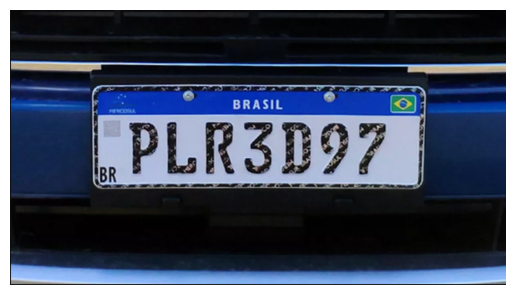

 largura 1083 altura 601  em pixels canais 3 


In [3]:

imagem_placa = cv2.imread('placa_carro1.png')
imagem_placa = cv2.cvtColor(imagem_placa,cv2.COLOR_BGR2RGB)
plt.imshow(imagem_placa)
plt.axis('off')
plt.show()

input = imagem_placa
linhas = len(input)
colunas = len(input[0])
cor = len(input[0][0])
print(' largura {} altura {}  em pixels canais {} ' . format(colunas, linhas, cor))

Gray

Blur


In [39]:
k = 7

tonsdecinza = image_to_gray(input)

box = zero_box(tonsdecinza,k)

fatias = slice_image(box,k)

listademediasdaimagem = calc_slice_averages(fatias)

blur_slice = build_image(listademediasdaimagem,tonsdecinza)

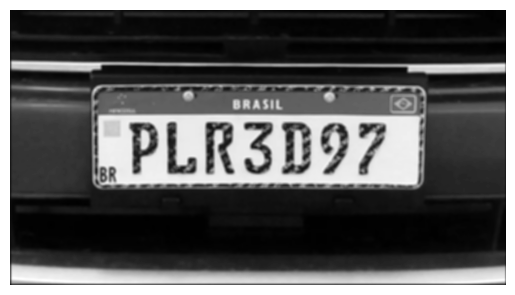

In [40]:

plt.imshow(blur_slice, cmap='gray')
plt.axis('off')
plt.show()

Limiarização

In [37]:
l = 120
limiarized = image_threshold(tonsdecinza,l)

Original


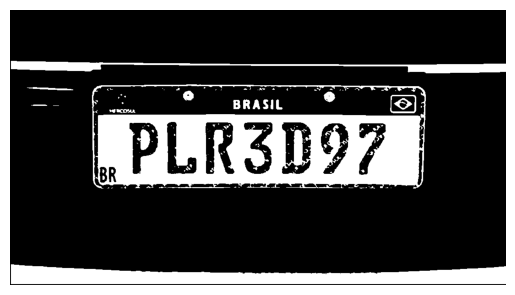

In [38]:
print('Original')
plt.imshow(limiarized, cmap='gray')
plt.axis('off')
plt.show()

Adaptativo

In [34]:
j = 7
const_c = 10
# imagem em tons de cinza
tonsdecinza_2 = image_to_gray(input)
# inserir borda
box_2 = zero_box(tonsdecinza_2,j)
# Gerar os kernels de cálculo
kernels_2 = slice_image(box_2, j)
# Calcular
kern_calc_c = calc_slice_averages(kernels_2)
# construir uma nova imagem
tr_adapt = build_thresh_adapt(kern_calc_c,tonsdecinza_2, const_c)



Original


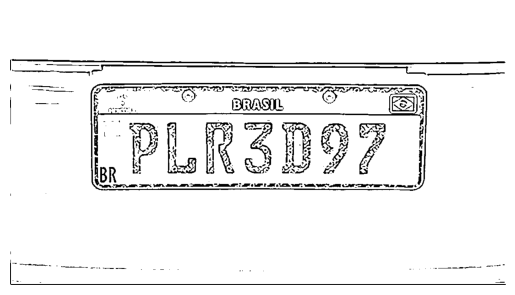

In [35]:
print('Original')
plt.imshow(tr_adapt, cmap='gray')
plt.axis('off')
plt.show()

Dilatação / Erosão